#Requirement install dan library yang diperlukan

##Install TPOT

In [1]:
pip install tpot

     |████████████████████████████████| 87 kB 3.8 MB/s 
     |████████████████████████████████| 160 kB 18.1 MB/s 
     |████████████████████████████████| 173.5 MB 9.7 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=6b50a8e63e9b9a3ae150f24c3f5791f2d59d3541d921db5e64dbe15e41ede18e
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


##Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from tpot import TPOTClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tpot import TPOTClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from google.colab import drive
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

#Eksplorasi Data

##Pembacaan dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Tugas Besar AML/weatherAUS.csv")

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


##Jumlah dan info data

In [4]:
print("Banyak Data : ",len(data))

Banyak Data :  145460


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

##Pengisian Fitur pada Dataset

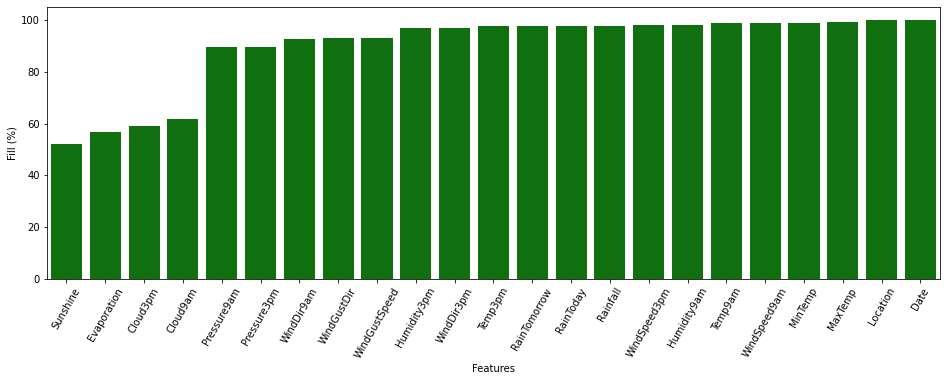

In [6]:
# Menghitung data yang bernilai tidak null pada suatu kolom
features_fill = pd.DataFrame(100 * data.count().sort_values() / data.shape[0])
features_fill.reset_index(inplace=True)
features_fill.columns = ['Features', 'Fill (%)']

# Visualisasi banyak data yang tidak null pada suatu kolom dalam bentuk persen
plt.figure(figsize=(16, 5))
sns.barplot(x = 'Features', y = 'Fill (%)', data = features_fill, color = 'green')
plt.xticks(rotation=60)
plt.show()

##Penentuan Jenis data

In [7]:
#Data Kategorikal
print('Data berjenis Kategorikal')
data.select_dtypes('object').columns

Data berjenis Kategorikal


Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
#Data Numerical
print('Data berjenis Numerical')
data.select_dtypes('float64').columns

Data berjenis Numerical


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

##Heatmap Correlations

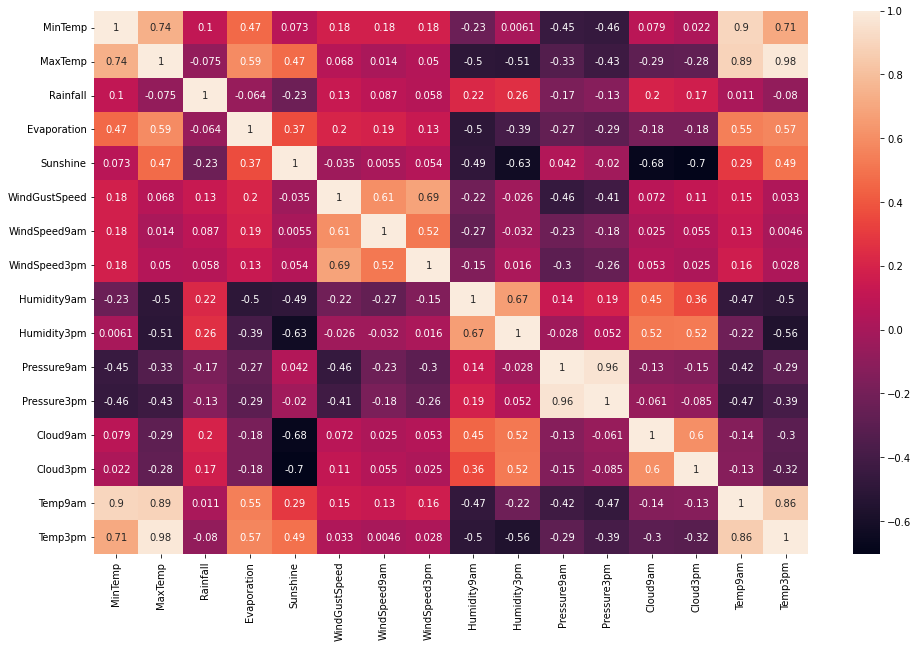

In [9]:
f, ax = plt.subplots(figsize=(16, 10))
RD = data.corr()
sns.heatmap(RD, ax=ax, annot=True)

#Preprocessing Data

##Drop Atribut yang tidak berkorelasi

In [10]:
data.drop(['Date'], axis=1, inplace=True)
data.drop(['Location'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   Evaporation    82670 non-null   float64
 4   Sunshine       75625 non-null   float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Cloud3pm       86102 non-null   float64
 17  Temp9am        143693 non-nul

##Drop data duplikat

In [11]:
# Copy dataframe
df_drop = data.copy()

# Drop data yang redundan
df_drop = df_drop.drop_duplicates()

# Reset index
df_drop.reset_index(drop=True, inplace=True)
data = df_drop
df_drop

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145225,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145226,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145227,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145228,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


##Mengubah data Kategorikal ke Numerikal

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145230 entries, 0 to 145229
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144193 non-null  float64
 2   Rainfall       142154 non-null  float64
 3   Evaporation    82669 non-null   float64
 4   Sunshine       75624 non-null   float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Cloud3pm       86102 non-null   float64
 17  Temp9am        143693 non-nul

In [13]:
UbahData = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
UbahData

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [14]:
labelencoder = LabelEncoder()
for i in UbahData:
  data[i] = data[i].astype(str)
  data[i] = labelencoder.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145230 entries, 0 to 145229
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144193 non-null  float64
 2   Rainfall       142154 non-null  float64
 3   Evaporation    82669 non-null   float64
 4   Sunshine       75624 non-null   float64
 5   WindGustDir    145230 non-null  int64  
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     145230 non-null  int64  
 8   WindDir3pm     145230 non-null  int64  
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Cloud3pm       86102 non-null   float64
 17  Temp9am        143693 non-nul

##Penanganan Missing Value (Drop Data)

In [15]:
totaldata = data.isnull().sum().sort_values(ascending=False)
presentasedata = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)

datahilang = pd.concat([totaldata, presentasedata], axis=1, keys=['Total', 'Percent'])
datahilang

,Total,Percent
Sunshine,69606,0.479281
Evaporation,62561,0.430772
Cloud3pm,59128,0.407134
Cloud9am,55658,0.383240
Pressure9am,14835,0.102148
Pressure3pm,14798,0.101894
WindGustSpeed,10033,0.069084
Humidity3pm,4277,0.029450
Temp3pm,3379,0.023267
Rainfall,3076,0.021180


In [16]:
#Melakukan drop pada kolom yang memiliki persentase missing value lebih dari 30%
dropList = list(datahilang[datahilang['Percent'] > 0.30].index)
data.drop(dropList, axis=1, inplace=True)

In [17]:
#Memenuhi missing values pada dataframe
data = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(data), columns = data.columns)

In [18]:
#Pemeriksaan data kosong pada setiap kolom
Periksadata = data.isnull().sum().sort_values(ascending=False)
Periksadata

RainTomorrow     0
WindSpeed9am     0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed3pm     0
RainToday        0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
MinTemp          0
dtype: int64

##Drop Outlier data

In [19]:
print("jumlah data dengan outliers", data.shape)

# Drop outliers
data = data[(np.abs(stats.zscore(data.select_dtypes(include=np.number))) < 3).all(axis=1)]

print("jumlah data tanpa outliers", data.shape)

# Reset index
data.reset_index(drop=True, inplace=True)
data

jumlah data dengan outliers (145230, 17)
jumlah data tanpa outliers (134202, 17)


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134197,3.5,21.8,0.0,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,0.0
134198,2.8,23.4,0.0,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0
134199,3.6,25.3,0.0,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0
134200,5.4,26.9,0.0,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0


##Data Split dan Scalling

In [20]:
#dataset yang sudah diolah diekspor ke dalam csv terbaru
data.to_csv('DatasetBaru.csv')

In [21]:
#Data Split
X = data.drop('RainTomorrow',axis=1)
y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.75, test_size = 0.25)

In [22]:
#Data Scalling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

#Pemodelan menggunakan Machine Learning Automation Tools (TPOT)

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, n_jobs=1, periodic_checkpoint_folder='/content/drive/MyDrive/Tugas Besar AML/TPOT awal')
tpot.fit(X_train_scaled,y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.85615642726431

Generation 2 - Current best internal CV score: 0.8569909936414251

Generation 3 - Current best internal CV score: 0.8569909936414251

Generation 4 - Current best internal CV score: 0.8569909936414251

Generation 5 - Current best internal CV score: 0.8569909936414251

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)


TPOTClassifier(generations=5,
               periodic_checkpoint_folder='/content/drive/MyDrive/Tugas Besar '
                                          'AML/TPOT awal',
               population_size=50, verbosity=2)

##Model Validation (Data Test Validation)

In [ ]:
print('accuration: ', tpot.score(X_test_scaled, y_test))

accuration:  0.8580668236416202


In [ ]:
y_prediction = tpot.predict(X_test_scaled)
print('classification report: \n', classification_report(y_test, y_prediction))

classification report: 
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     26574
         1.0       0.74      0.49      0.59      6977

    accuracy                           0.86     33551
   macro avg       0.81      0.72      0.75     33551
weighted avg       0.85      0.86      0.85     33551



##KFold Validation (Data Train Validation)

## Untuk mencari pipeline terbaik yang didapat dari tpot

In [ ]:
pipeline = tpot.fitted_pipeline_

In [ ]:
kfold = KFold(n_splits=5)
scores = []
X_Kfold = data.iloc[:,:-1]
y_Kfold = data.iloc[:,-1]

In [ ]:
for train_index, test_index in kfold.split(X_Kfold):
  X_train , X_test = X_Kfold.iloc[train_index,:],X_Kfold.iloc[test_index,:]
  y_train , y_test = y_Kfold[train_index] , y_Kfold[test_index]
  
  X_train_scaled = ss.fit_transform(X_train)
  X_test_scaled = ss.transform(X_test)
  
  pipeline.fit(X_train,y_train)
  
  acc = pipeline.score(X_test, y_test)
  print('accuration: ', acc)
  scores.append(acc)

  y_prediction = pipeline.predict(X_test)
  print('classification report: \n', classification_report(y_test, y_prediction))

accuration:  0.848030997354793
classification report: 
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     21343
         1.0       0.69      0.47      0.56      5498

    accuracy                           0.85     26841
   macro avg       0.78      0.71      0.73     26841
weighted avg       0.84      0.85      0.84     26841

accuration:  0.8344323981967885
classification report: 
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.90     21211
         1.0       0.63      0.50      0.56      5630

    accuracy                           0.83     26841
   macro avg       0.75      0.71      0.73     26841
weighted avg       0.82      0.83      0.83     26841

accuration:  0.8459388971684053
classification report: 
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     20930
         1.0       0.70      0.52      0.60      5910

    accuracy

In [ ]:
rataakurasi = sum(scores)/len(scores)
print('akurasi tiap pipeline - {}'.format(scores))
print('akurasi rata-rata : {}'.format(rataakurasi))

akurasi tiap lipatan — [0.848030997354793, 0.8344323981967885, 0.8459388971684053, 0.8514157973174367, 0.865946348733234]
akurasi rata-rata : 0.8491528877541314


#Eksperimen 1

Konfigurasi operator yang digunakan adalah TPOT Light dikarenakan TPOT ini akan mencari pada rentang terbatas dari praprosesor, konstruktor fitur, penyeleksi fitur, model, dan parameter untuk menemukan serangkaian operator yang meminimalkan kesalahan prediksi model. Hanya operator yang lebih sederhana dan berjalan cepat yang akan digunakan dalam jalur pipa ini, jadi TPOT Light ini  berguna untuk menemukan jalur pipa yang cepat dan sederhana untuk masalah klasifikasi atau regresi.

In [ ]:
Eksperimen1 = TPOTClassifier(generations=10, population_size=5,random_state=42, cv=5, early_stop=4, verbosity=2, n_jobs=1,config_dict='TPOT light', periodic_checkpoint_folder='/content/drive/MyDrive/Tugas Besar AML/TPOT Light')
Eksperimen1.fit(X_train_scaled,y_train)

Optimization Progress:   0%|          | 0/55 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8463900211685985

Generation 2 - Current best internal CV score: 0.8463900211685985

Generation 3 - Current best internal CV score: 0.8490725697007502

Generation 4 - Current best internal CV score: 0.849102374972988

Generation 5 - Current best internal CV score: 0.849102374972988

Generation 6 - Current best internal CV score: 0.8493904991851313

Generation 7 - Current best internal CV score: 0.8493904991851313

Generation 8 - Current best internal CV score: 0.8493904991851313

Generation 9 - Current best internal CV score: 0.8516457911065037

Generation 10 - Current best internal CV score: 0.8516457911065037

Best pipeline: KNeighborsClassifier(DecisionTreeClassifier(LogisticRegression(input_matrix, C=5.0, dual=False, penalty=l2), criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=10), n_neighbors=21, p=2, weights=distance)


TPOTClassifier(config_dict='TPOT light', early_stop=4, generations=10,
               periodic_checkpoint_folder='/content/drive/MyDrive/Tugas Besar '
                                          'AML/TPOT Light',
               population_size=5, random_state=42, verbosity=2)

##Data Test Validation

In [ ]:
print('accuration: ', Eksperimen1.score(X_test_scaled, y_test))

accuration:  0.8538642663407946


In [ ]:
y_prediction = Eksperimen1.predict(X_test_scaled)
print('classification report: \n', classification_report(y_test, y_prediction))

classification report: 
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     26705
         1.0       0.73      0.46      0.56      6846

    accuracy                           0.85     33551
   macro avg       0.80      0.71      0.74     33551
weighted avg       0.84      0.85      0.84     33551



##Data Train Validation

In [ ]:
pipeline = Eksperimen1.fitted_pipeline_
kfold = KFold(n_splits=5)
scores = []
X_Kfold = data.iloc[:,:-1]
y_Kfold = data.iloc[:,-1]

In [ ]:
for train_index, test_index in kfold.split(X_Kfold):
  X_train , X_test = X_Kfold.iloc[train_index,:],X_Kfold.iloc[test_index,:]
  y_train , y_test = y_Kfold[train_index] , y_Kfold[test_index]
  
  X_train_scaled = ss.fit_transform(X_train)
  X_test_scaled = ss.transform(X_test)
  
  pipeline.fit(X_train,y_train)
  
  acc = pipeline.score(X_test, y_test)
  print('accuration: ', acc)
  scores.append(acc)

  y_prediction = pipeline.predict(X_test)
  print('classification report: \n', classification_report(y_test, y_prediction))

accuration:  0.8491859468723222
classification report: 
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     21343
         1.0       0.73      0.42      0.53      5498

    accuracy                           0.85     26841
   macro avg       0.80      0.69      0.72     26841
weighted avg       0.84      0.85      0.83     26841

accuration:  0.8316754219291382
classification report: 
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     21211
         1.0       0.63      0.47      0.54      5630

    accuracy                           0.83     26841
   macro avg       0.75      0.70      0.72     26841
weighted avg       0.82      0.83      0.82     26841

accuration:  0.8411698956780924
classification report: 
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     20930
         1.0       0.71      0.48      0.57      5910

    accurac